In [1]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex

In [2]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, array_to_latex  

# Ejemplo de vector de estado |+> 
e_mas =1/np.sqrt(2)*np.array([1,1j])


Statevector(e_mas).draw('latex')

<IPython.core.display.Latex object>

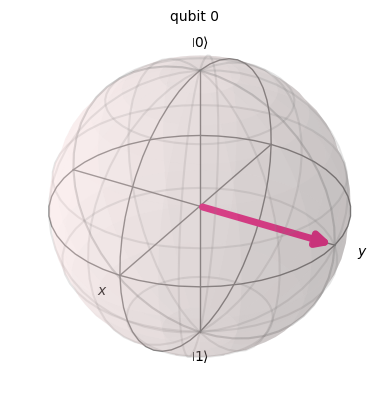

In [3]:
Statevector(e_mas).draw('Bloch')

In [4]:
theta = 1.9
phi   = 0.8

uket = np.array([np.cos(theta/2),(np.exp(1j*phi))*np.sin(theta/2)]).reshape(2,1)

array_to_latex(uket,prefix= '\ket{u} = ')

<IPython.core.display.Latex object>

In [5]:
Statevector(uket).draw('latex')

<IPython.core.display.Latex object>

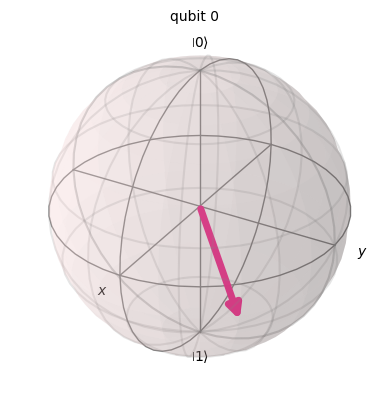

In [6]:
Statevector(uket).draw('Bloch')

/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


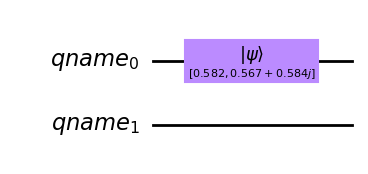

In [7]:
'en qiskit podemos inicializar un registro cuántico en un estado |q> arbitrario usando el método initialize()'
from qiskit import QuantumCircuit, QuantumRegister

qr = QuantumRegister(2,name='qname')
qc = QuantumCircuit(qr)

theta = 1.9
phi   = 0.8

ket = [np.cos(theta/2),(np.exp(1j*phi))*np.sin(theta/2)]

qc.initialize(ket,qr[0])
qc.draw(output='mpl')

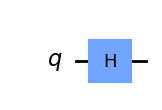

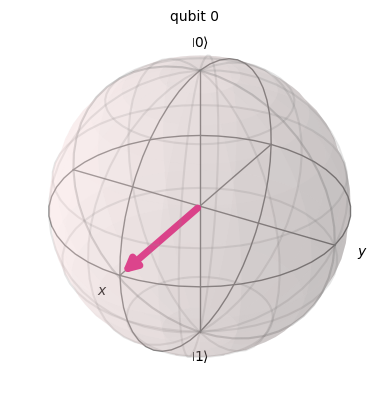

In [8]:
from qiskit import Aer, execute, QuantumCircuit
from qiskit.quantum_info import Statevector



qc = QuantumCircuit(1)

#qc.u(theta,phi,varphi,0) 
qc.h(0)

display(qc.draw(output='mpl'))


Statevector(qc).draw('Bloch')

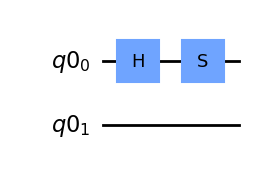

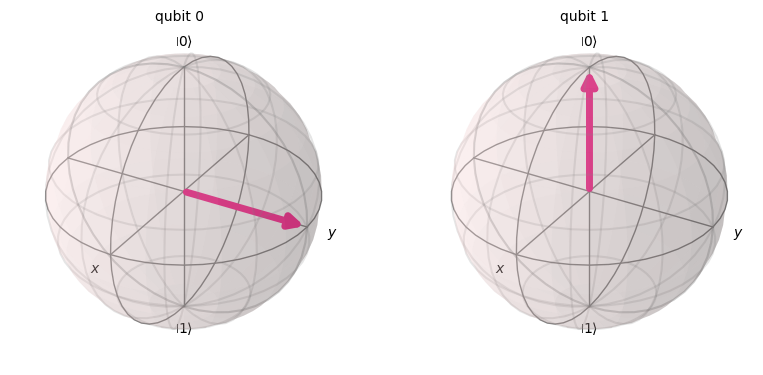

In [9]:
from qiskit import Aer, execute, QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector

qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

#qc.x(1)
#qc.y(0)
qc.h(0)
#qc.z(0)
qc.s(0)
#qc.t(0)

# qc.u(theta,phi,lambda,quantum register)  https://qiskit.org/documentation/stubs/qiskit.circuit.library.UGate.html
#qc.u(np.pi/4,np.pi/2,0,0)
display(qc.draw(output='mpl'))

Statevector(qc).draw('Bloch')

In [10]:
### Circuit matrix representation
U_simulator = Aer.get_backend('unitary_simulator')
job = execute(qc, backend = U_simulator)

U_matrix = job.result().get_unitary()

print(U_matrix)

'this looks very ugly, let us use latex'
from qiskit.tools.visualization import array_to_latex
array_to_latex(U_matrix, prefix="\\text{Unitary matrix = }\n")

Operator([[ 7.07106781e-01+0.00000000e+00j,
            7.07106781e-01-8.65956056e-17j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j],
          [-0.00000000e+00+7.07106781e-01j,
           -8.65956056e-17-7.07106781e-01j,
           -0.00000000e+00+0.00000000e+00j,
           -0.00000000e+00+0.00000000e+00j],
          [ 0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            7.07106781e-01+0.00000000e+00j,
            7.07106781e-01-8.65956056e-17j],
          [-0.00000000e+00+0.00000000e+00j,
           -0.00000000e+00+0.00000000e+00j,
           -0.00000000e+00+7.07106781e-01j,
           -8.65956056e-17-7.07106781e-01j]],
         input_dims=(2, 2), output_dims=(2, 2))


<IPython.core.display.Latex object>

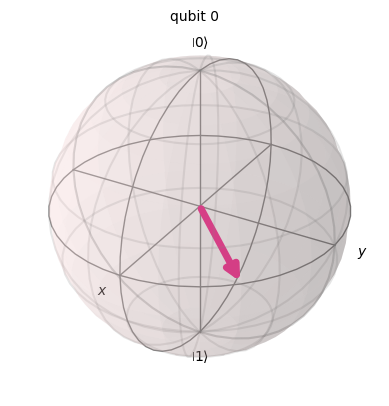

In [11]:
qc = QuantumCircuit(1,1)

qc.h(0)
qc.t(0)

Statevector(qc).draw('Bloch')